# LightGBM学习示例
姓名：邹子涵  
学号：202020085400139

# 建立模型

In [1]:
import pandas as pd
import lightgbm as lgb
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import mean_squared_error


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
data = pd.read_csv('dataset/abalone.data',header=None,names=['Sex','Length','Diameter','Height','Whole-weight','Shucked-weight','Viscera-weight','Shell-weight','Rings'])
data.loc[(data['Sex']=="M"),'Sex']=0
data.loc[(data['Sex']=="F"),'Sex']=1
data.loc[(data['Sex']=="I"),'Sex']=2
n = len(data)+1
nlist = range(1,n)
data['id'] = nlist
data['Rings'] = np.log(data['Rings'])
data

,Sex,Length,Diameter,Height,Whole-weight,Shucked-weight,Viscera-weight,Shell-weight,Rings,id
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,2.708050,1
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,1.945910,2
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,2.197225,3
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,2.302585,4
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,1.945910,5
...,...,...,...,...,...,...,...,...,...,...
4172,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,2.397895,4173
4173,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,2.302585,4174
4174,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,2.197225,4175
4175,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,2.302585,4176


In [3]:
train,test = train_test_split(data,test_size=0.2,random_state=0)
train

,Sex,Length,Diameter,Height,Whole-weight,Shucked-weight,Viscera-weight,Shell-weight,Rings,id
3141,2,0.180,0.135,0.080,0.0330,0.0145,0.0070,0.0100,1.609438,3142
3521,2,0.215,0.150,0.055,0.0410,0.0150,0.0090,0.0125,1.098612,3522
883,0,0.660,0.530,0.170,1.3905,0.5905,0.2120,0.4530,2.708050,884
3627,0,0.715,0.525,0.200,1.8900,0.9500,0.4360,0.4305,2.302585,3628
2106,0,0.595,0.455,0.155,1.0410,0.4160,0.2105,0.3650,2.639057,2107
...,...,...,...,...,...,...,...,...,...,...
1033,0,0.650,0.525,0.185,1.6220,0.6645,0.3225,0.4770,2.302585,1034
3264,1,0.655,0.500,0.140,1.1705,0.5405,0.3175,0.2850,2.484907,3265
1653,0,0.595,0.450,0.145,0.9590,0.4630,0.2065,0.2535,2.302585,1654
2607,1,0.625,0.490,0.165,1.1270,0.4770,0.2365,0.3185,2.197225,2608


In [4]:
col_features = ['Length','Diameter','Height','Whole-weight','Shucked-weight','Viscera-weight','Shell-weight']

In [5]:
y_train = train['Rings']
y_test = test['Rings']
X_train = train[col_features]
X_test = test[col_features]

In [6]:
print('开始训练...')
# 直接初始化LGBMRegressor
# 这个LightGBM的Regressor和sklearn中其他Regressor基本是一致的
gbm = lgb.LGBMRegressor(objective='regression',
                        num_leaves=31,
                        learning_rate=0.05,
                        n_estimators=20)

开始训练...


In [7]:
# 使用fit函数拟合
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='l1',
        early_stopping_rounds=5)

[1]	valid_0's l1: 0.246934	valid_0's l2: 0.102103
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 0.239647	valid_0's l2: 0.096088
[3]	valid_0's l1: 0.232761	valid_0's l2: 0.0906872
[4]	valid_0's l1: 0.226526	valid_0's l2: 0.0858003
[5]	valid_0's l1: 0.220671	valid_0's l2: 0.0814027
[6]	valid_0's l1: 0.215125	valid_0's l2: 0.0773429
[7]	valid_0's l1: 0.2101	valid_0's l2: 0.0737105
[8]	valid_0's l1: 0.20574	valid_0's l2: 0.0704171
[9]	valid_0's l1: 0.201648	valid_0's l2: 0.0674953
[10]	valid_0's l1: 0.197589	valid_0's l2: 0.0646706
[11]	valid_0's l1: 0.193889	valid_0's l2: 0.0622652
[12]	valid_0's l1: 0.190404	valid_0's l2: 0.0599897
[13]	valid_0's l1: 0.187057	valid_0's l2: 0.0579597
[14]	valid_0's l1: 0.184078	valid_0's l2: 0.0560922
[15]	valid_0's l1: 0.181365	valid_0's l2: 0.0544116
[16]	valid_0's l1: 0.178764	valid_0's l2: 0.0529102
[17]	valid_0's l1: 0.17642	valid_0's l2: 0.0515316
[18]	valid_0's l1: 0.174184	valid_0's l2: 0.0502696
[19]	valid_0's l1: 

LGBMRegressor(learning_rate=0.05, n_estimators=20, objective='regression')

In [8]:
# 预测
print('开始预测...')
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)
# 评估预测结果
print('预测结果的rmse是:')
print(mean_squared_error(y_test, y_pred) ** 0.5)

开始预测...
预测结果的rmse是:
0.21912833130002277


# sklearn与LightGBM配合使用
LightGBM建模，sklearn评估

In [9]:
# 配合scikit-learn的网格搜索交叉验证选择最优超参数
estimator = lgb.LGBMRegressor(num_leaves=31)

param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [20, 40]
}

gbm = GridSearchCV(estimator, param_grid)

gbm.fit(X_train, y_train)

print('用网格搜索找到的最优超参数为:')
print(gbm.best_params_)

用网格搜索找到的最优超参数为:
{'learning_rate': 0.1, 'n_estimators': 40}


In [10]:
# 构建lgb中的Dataset数据格式
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [11]:
# 设定参数
params = {
    'num_leaves': 5,
    'metric': ('l1', 'l2'),
    'verbose': 0
}

In [12]:
evals_result = {}  # to record eval results for plotting

In [13]:
print('开始训练...')
# 训练
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=100,
                valid_sets=[lgb_train, lgb_test],
                feature_name=['f' + str(i + 1) for i in range(7)],
                categorical_feature=[21],
                evals_result=evals_result,
                verbose_eval=10)


开始训练...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000268 seconds.
You can set `force_col_wise=true` to remove the overhead.
[10]	training's l1: 0.174698	training's l2: 0.0528036	valid_1's l1: 0.185061	valid_1's l2: 0.0564061
[20]	training's l1: 0.158962	training's l2: 0.0431419	valid_1's l1: 0.167107	valid_1's l2: 0.0461847
[30]	training's l1: 0.153613	training's l2: 0.0399823	valid_1's l1: 0.161726	valid_1's l2: 0.0430753
[40]	training's l1: 0.150035	training's l2: 0.0382773	valid_1's l1: 0.158755	valid_1's l2: 0.041484
[50]	training's l1: 0.147632	training's l2: 0.0370814	valid_1's l1: 0.156488	valid_1's l2: 0.0404316
[60]	training's l1: 0.145639	training's l2: 0.0361481	valid_1's l1: 0.154522	valid_1's l2: 0.0396776
[70]	training's l1: 0.143934	training's l2: 0.0353724	valid_1's l1: 0.15332	valid_1's l2: 0.0392342
[80]	training's l1: 0.142986	training's l2: 0.0348732	valid_1's l1: 0.153289	valid_1's l2: 0.0391782
[90]	training's l1: 0

In [14]:
# 保存模型
print('保存模型...')
# 保存模型到文件中
gbm.save_model('.\model.txt')

保存模型...


在训练过程中绘图...


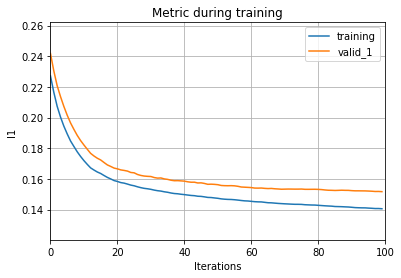

In [15]:
print('在训练过程中绘图...')
ax = lgb.plot_metric(evals_result, metric='l1')
plt.show()

画出特征重要度...


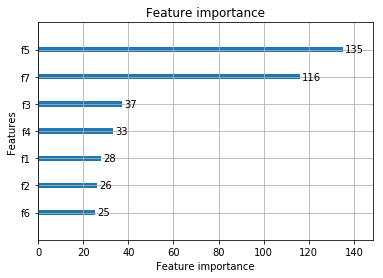

In [16]:
print('画出特征重要度...')
ax = lgb.plot_importance(gbm, max_num_features=10)
plt.show()